In [86]:
import pandas as pd
import numpy as np

# Scikit-learn library: For SVM
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

# a)

In [87]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

path = "/content/drive/My Drive/creditcard.csv"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [88]:
data = pd.read_csv(path)
df = pd.DataFrame(data)
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


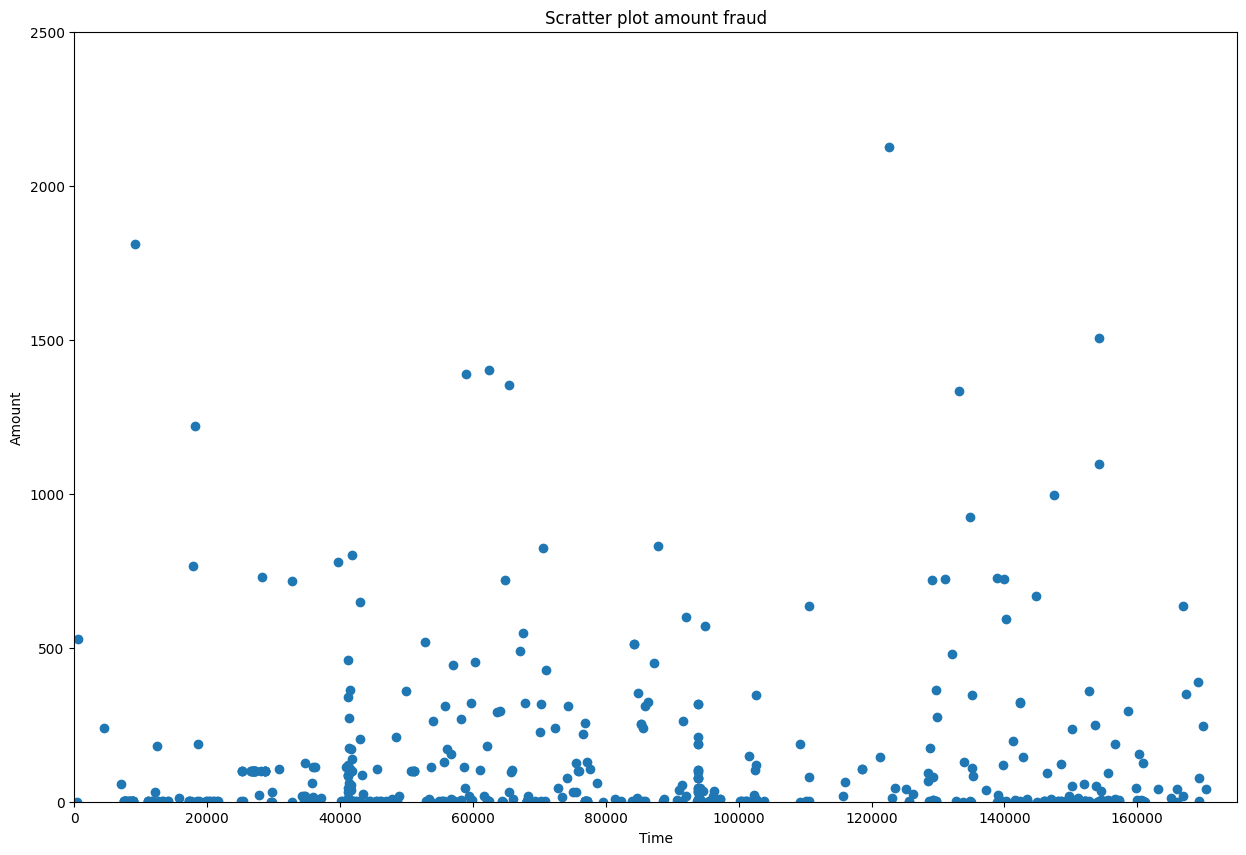

In [89]:
df_fraud = df[df['Class'] == 1]
plt.figure(figsize=(15,10))
plt.scatter(df_fraud['Time'], df_fraud['Amount'])
plt.title('Scratter plot amount fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

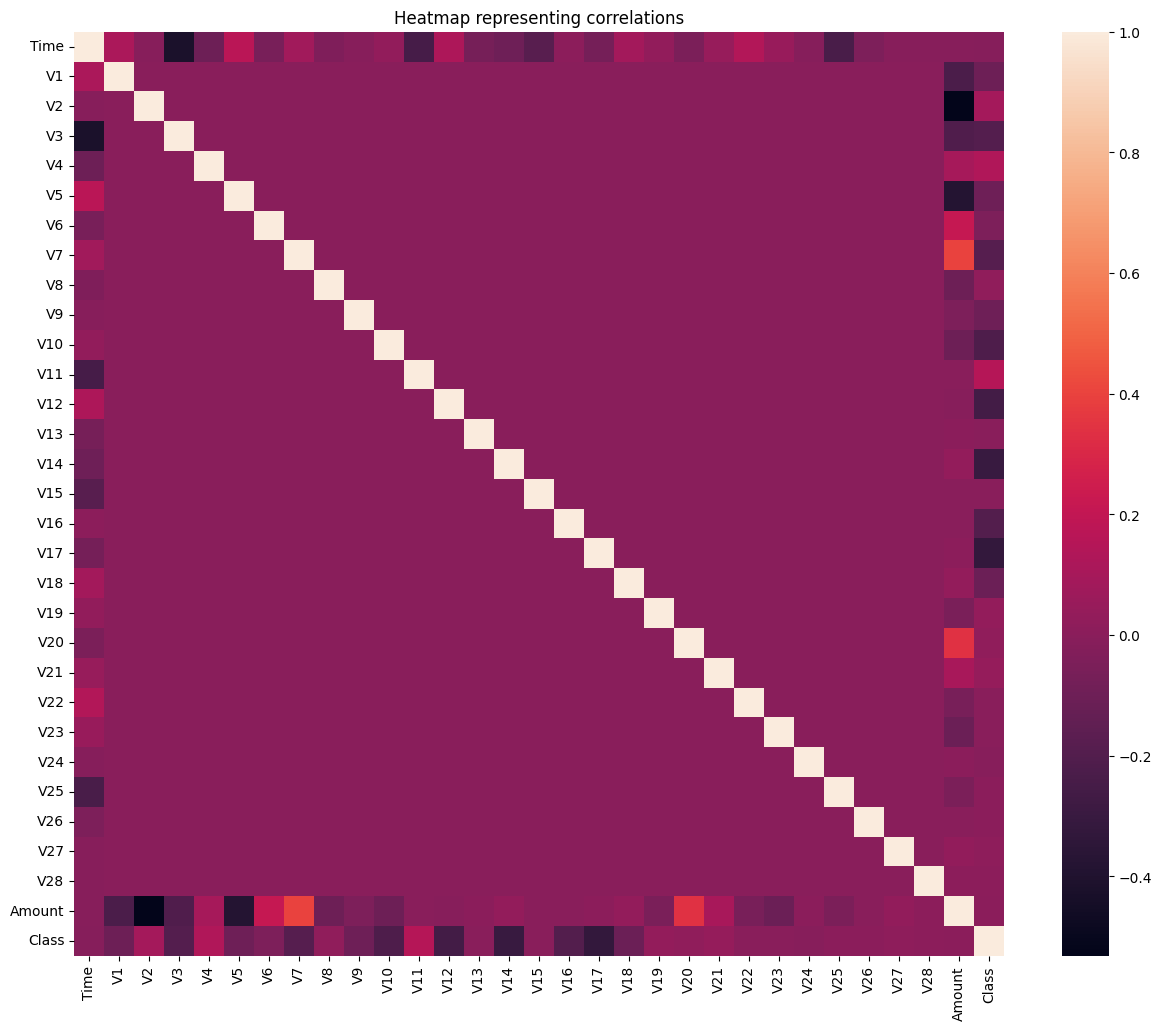

In [90]:
import seaborn as sns

plt.figure(figsize = (15, 12))
df_correlation = df.corr()
sns.heatmap(df_correlation)

plt.title("Heatmap representing correlations")
plt.show()

In [91]:
shuffled = df.sample(frac=1).reset_index()
shuffled = shuffled.drop(['index'],axis=1)

In [92]:
s = int(0.8*shuffled.shape[0])

df_train = df[:s]
df_train_fraud = df_train[df_train['Class'] == 1]
df_train_not_fraud = df_train[df_train['Class'] == 0]

print(df_train_fraud.shape[0])

417


In [93]:
df_sample = df_train_not_fraud.sample(500)
df_train_final = df_train_fraud.append(df_sample)
df_train_final = df_train_final.sample(frac = 1).reset_index(drop = True)

X_train = df_train_final.drop(['Time', 'Class'],axis=1)
y_train = df_train_final['Class']

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

<ipython-input-93-0826050bf2a8>:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_train_final = df_train_fraud.append(df_sample)


In [94]:
df_val = df[s:]

X_val = df_val.drop(['Time', 'Class'],axis=1)
y_val = df_val['Class']

X_val = scaler.transform(X_val)

X_val = np.asarray(X_val)
y_val = np.asarray(y_val)
print(df_val['Class'].value_counts())

0    56887
1       75
Name: Class, dtype: int64


In [95]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

svm = SVC()


param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.1, 0.01, 0.001],
    'kernel': ['linear','poly','rbf']
}

# Perform grid search for parameter tuning
grid_search = GridSearchCV(svm, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)


# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
print(f"best_parems = {best_params}")

# Train the best model on the entire training set
best_model.fit(X_train, y_train)

# Evaluate the model on the validation set
y_pred = best_model.predict(X_val)
print(classification_report(y_val, y_pred))

best_parems = {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56887
           1       0.03      0.88      0.07        75

    accuracy                           0.97     56962
   macro avg       0.52      0.92      0.52     56962
weighted avg       1.00      0.97      0.98     56962



# b)

In [96]:
# Set the parameters for One-Class SVM

nu = 0.001  # Proportion of outliers to be detected (adjust as needed)
kernel = 'rbf'  # Radial basis function kernel
gamma = 'scale'  # Scale parameter for the kernel (adjust as needed)

# Create and train the One-Class SVM model
svm = OneClassSVM(kernel=kernel, gamma=gamma, nu=nu)
svm.fit(X_train)

y_pred_train = svm.predict(X_train)

# Count the number of outliers detected
num_outliers_train = len(y_pred_train[y_pred_train == -1])
print("Number of outliers detected in training data:", num_outliers_train)

Number of outliers detected in training data: 49


# c)

In [97]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Predict outliers on the validation data
y_pred_val = svm.predict(X_val)

# Calculate precision, recall, and F1-score
precision = precision_score(y_val, y_pred_val, average='micro')
recall = recall_score(y_val, y_pred_val, pos_label=-1,average='micro')
f1 = f1_score(y_val, y_pred_val, pos_label=-1,average='micro')

print("Precision: {}".format(precision))
print("Recall: {}".format(recall))
print("F1-score: {}".format(f1))

Precision: 0.0011937783083459147
Recall: 0.0011937783083459147
F1-score: 0.0011937783083459147


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to -1) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to -1) is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
